<a href="https://colab.research.google.com/github/parulsharma098/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_using_ML_Capstone_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

*Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.*


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

### Date : year-month-day
### Rented Bike count - Count of bikes rented at each hour
### Hour - Hour of he day
### Temperature-Temperature in Celsius
### Humidity - %
### Windspeed - m/s
### Visibility - 10m
### Dew point temperature - Celsius
### Solar radiation - MJ/m2
### Rainfall - mm
### Snowfall - cm
### Seasons - Winter, Spring, Summer, Autumn
### Holiday - Holiday/No holiday
### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Gathering and Discovery**

*Now in this section we will import our dataset and do some basic operations to see what sort of data that we have and what all attributes are there along with the dependent variable (Rented Bike count).*

# <b> Loading the dataset </b> #

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np

# For data visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting drive to load data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Supervised ML bike sharing demand Prediction/SeoulBikeData.csv',encoding = 'latin')


# <b> Preprocessing the Data </b> 

In [ ]:
# Checking the first 5 rows of the dataset

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking the last 5 rows of the dataset

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# List of columns of the dataset 

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Checking the Datatype of the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Checking the Statistical info 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
# Check the shape of dataset

df.shape

(8760, 14)

In [ ]:
# Checking null values of data 

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking duplicate

df.duplicated().sum()

0

# <b> Exploratary data analysis </b>

In [ ]:
# Converting the Date column in Datetime Dtype as it is in object Dtype

df['Date']=pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#Seperate Day, Month, Year from DataFrame Column

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
# drop the Date column after extracting necessory information

df.drop(columns=['Date'],inplace=True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


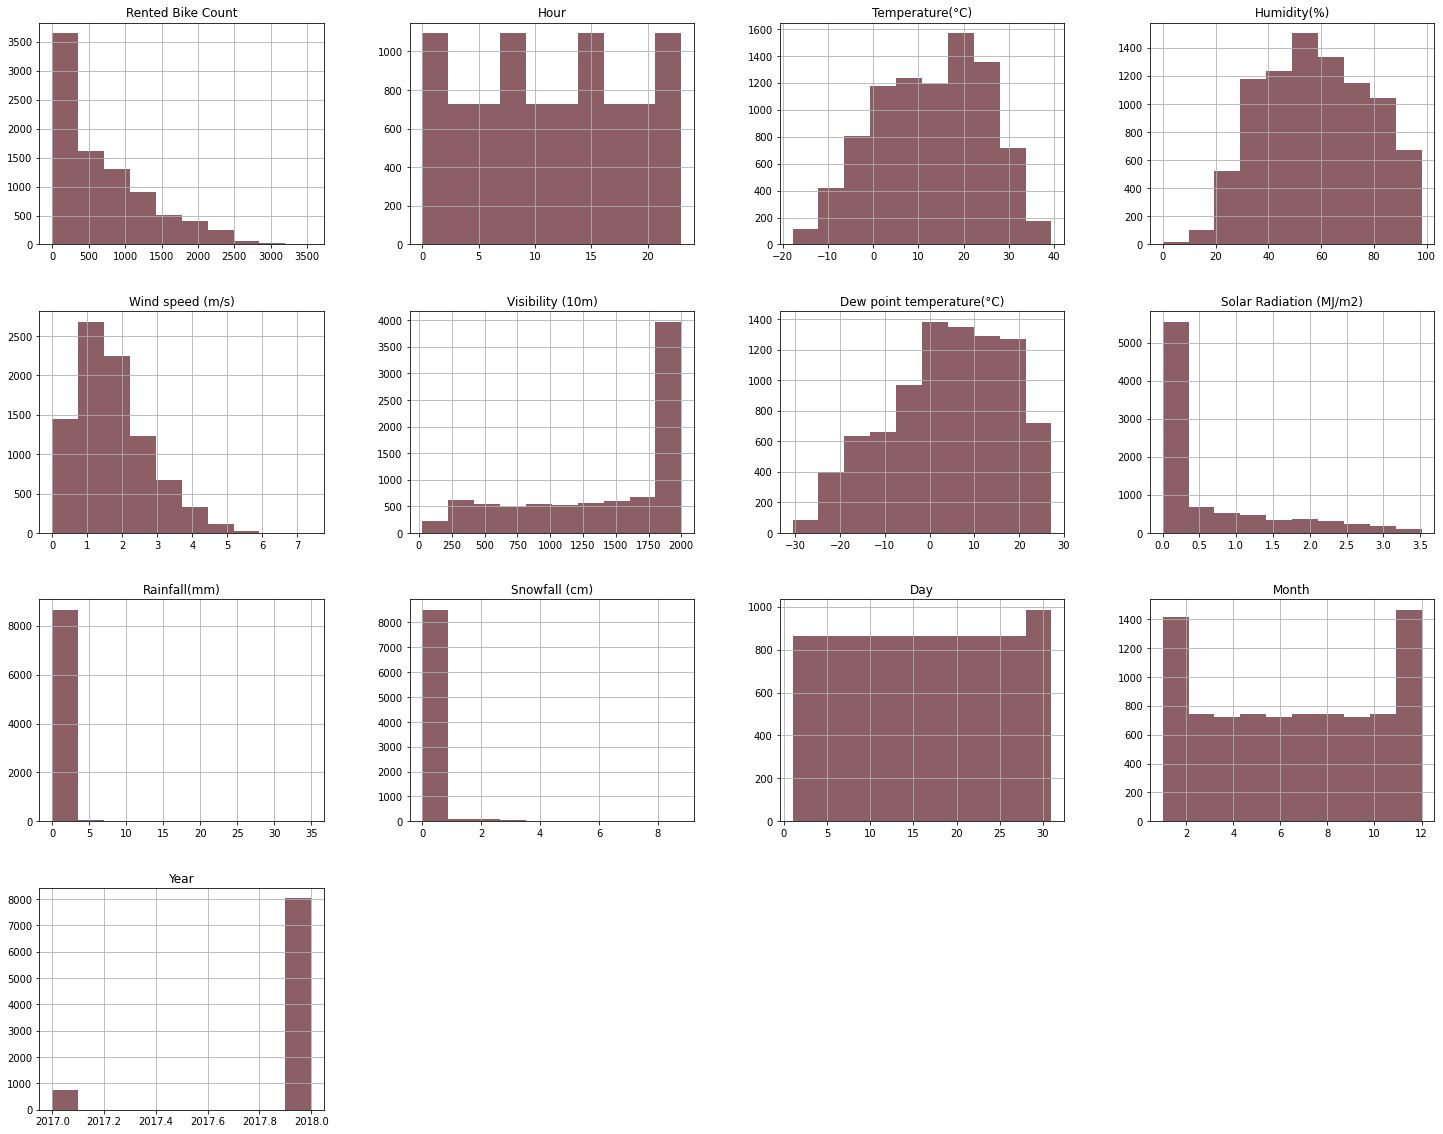

In [ ]:
# plotting histogram of all the features of the dataset for bivariate analysis.

df.hist(figsize=(25,20),color='#8B5F65')
plt.show()

## <b> Checking Multicollinearity </b>

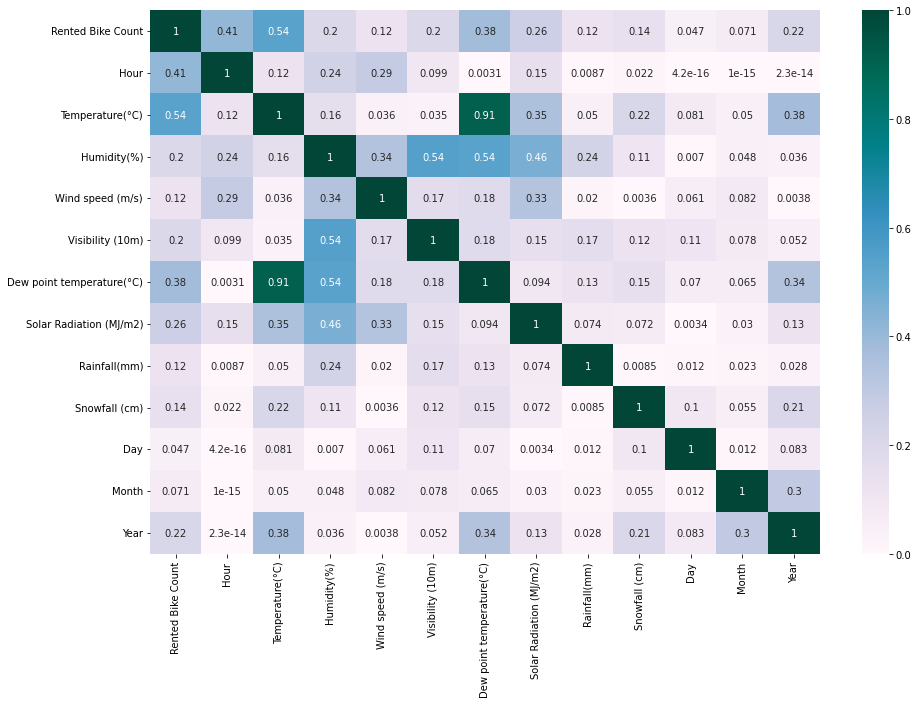

In [ ]:
# using correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

In [ ]:
# As we can see from the above correlation matrix that the columns Dew point temperature(°C) and Temperature(°C) are highly correlated.
# which leads to multicollinearity so we will drop the Dew point temperature(°C) column from our dataframe.

df = df.drop(['Dew point temperature(°C)'],axis=1)

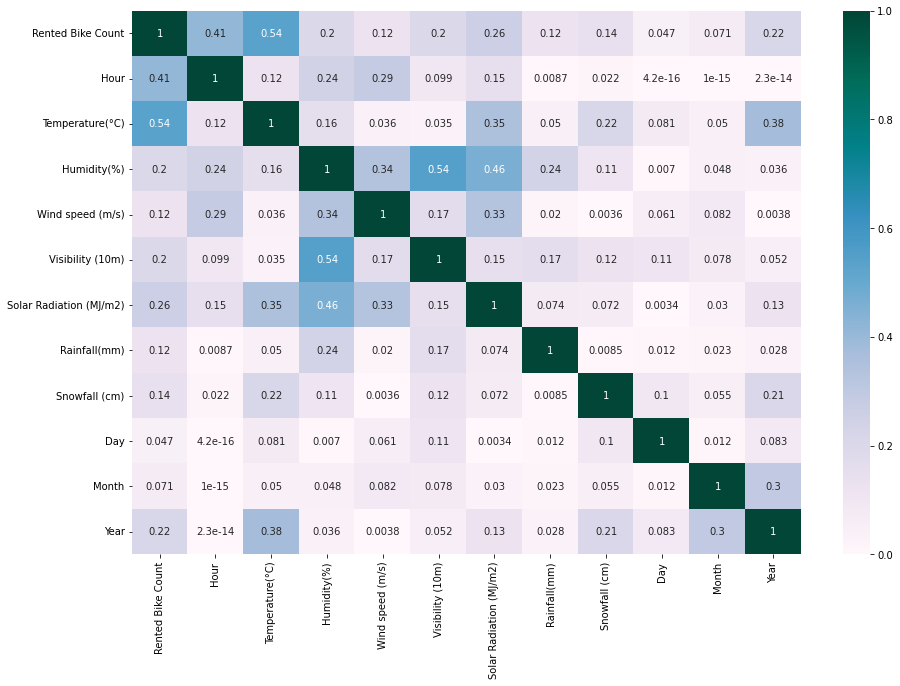

In [ ]:
# Check multicollinearity after removing the Dew point temperature(°C) column from our dataframe.

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

## <b> Feature Engineering

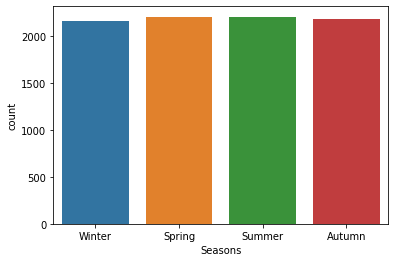

In [ ]:
# Checking the value count of the Seasons column.

df.Seasons.value_counts()
sns.countplot(x= df['Seasons'])

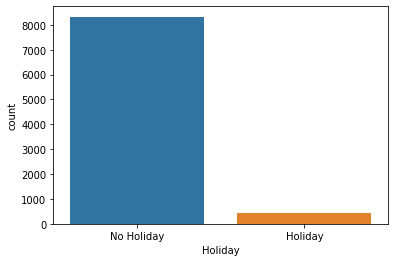

In [ ]:
# Checking the value count of the Holiday column.

df.Holiday.value_counts()
sns.countplot(x= df['Holiday'])

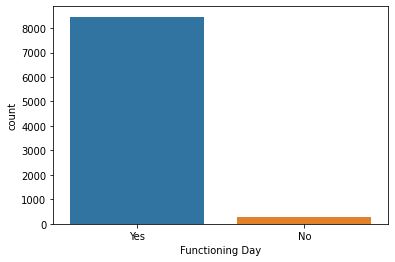

In [ ]:
# Checking the value count of the Functioning Day column.

df['Functioning Day'].value_counts()
sns.countplot(x= df['Functioning Day'])

In [ ]:
# Converting categorical variable to numeric variable for ease in prediction by using map function.

df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning_Day']=df['Functioning Day'].map({'Yes':1,'No':0})


In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,IsHoliday,Functioning_Day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,0,1


In [ ]:
# Encode categorical features
# The categorical features must be encoded to ensure that the models can interpret them. 
# One-hot encoding is used since none of the categorical features are ordinal.

seasons= pd.get_dummies(df.Seasons)
seasons

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8755,1,0,0,0
8756,1,0,0,0
8757,1,0,0,0
8758,1,0,0,0


In [ ]:
# Concatenating the dataframe with the dummy dataset of seasons column.
  
df = pd.concat( [df, seasons], axis = 1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Functioning Day,Day,Month,Year,IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,...,Yes,12,1,2017,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,...,Yes,12,1,2017,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,...,Yes,12,1,2017,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,...,Yes,12,1,2017,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,...,Yes,12,1,2017,0,1,0,0,0,1


In [ ]:
# After Conversion of variable to numerical droping the original columns to avoid ambiguity.

df = df.drop(['Functioning Day','Holiday','Seasons'],axis=1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year,IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017,0,1,0,0,0,1


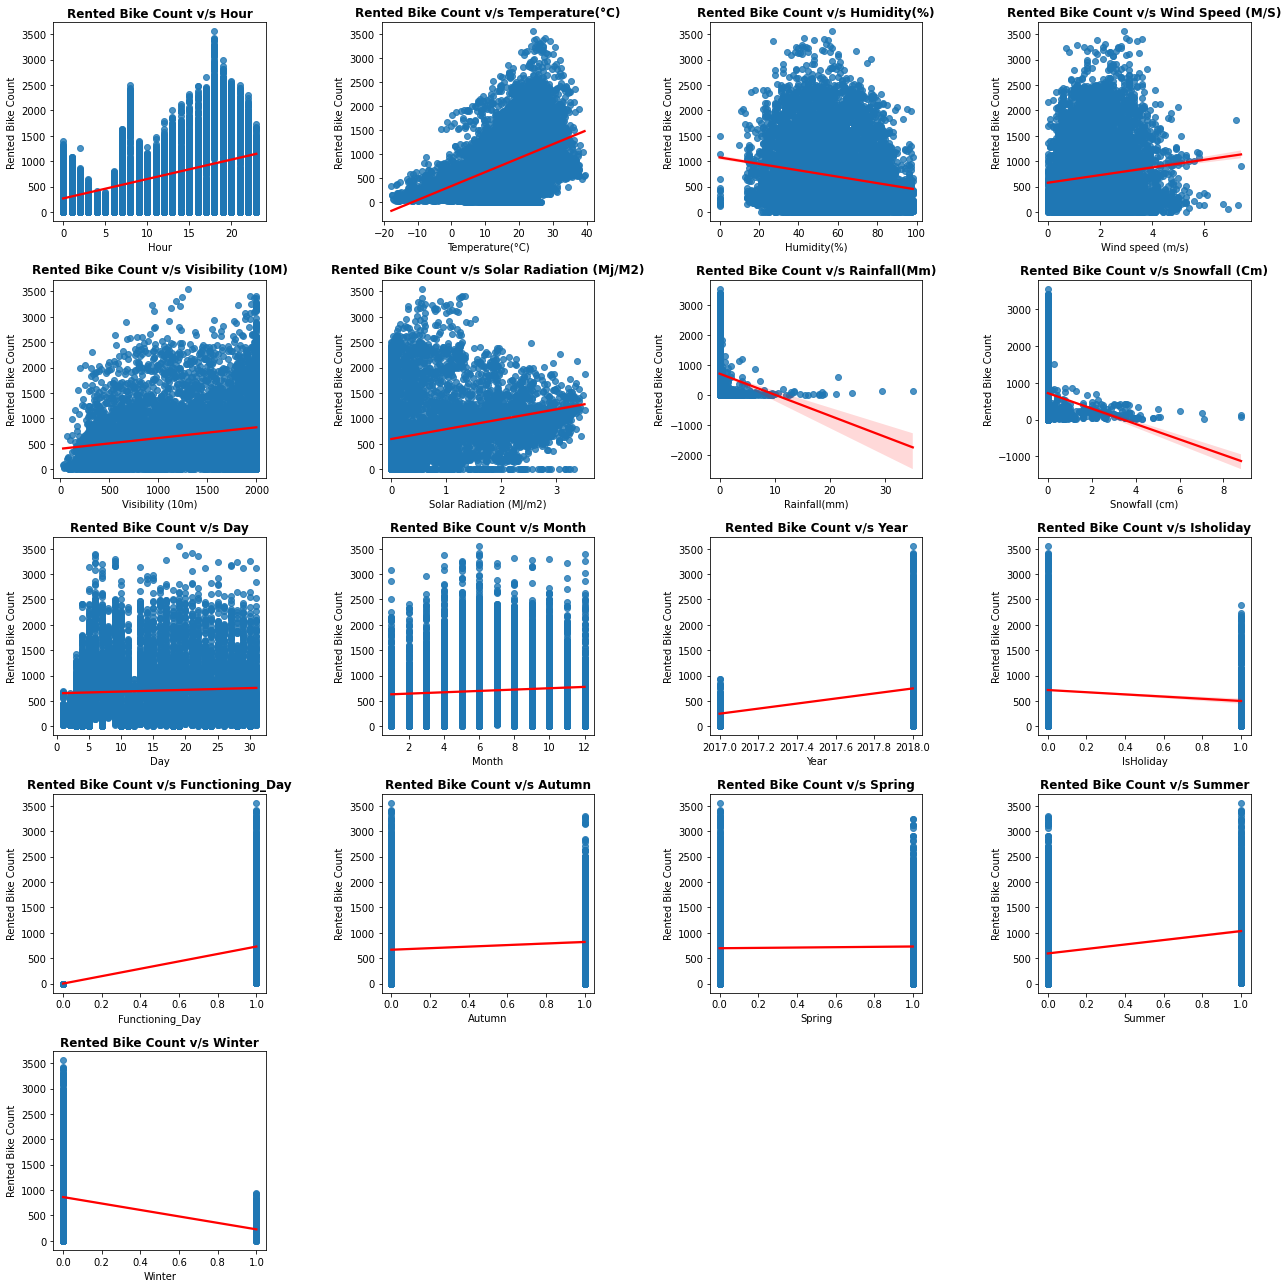

In [ ]:
import matplotlib.pyplot as plt

# Creat independent variables
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]

# Check linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x=column, y='Rented Bike Count', line_kws={"color":"red"})
  plt.title(f'Rented Bike Count v/s {column.title()}', fontweight='bold')
  plt.tight_layout()

## <b> Outlier Detection </b>

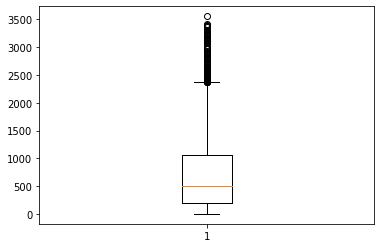

In [ ]:
plt.boxplot(df['Rented Bike Count'])
plt.show()

In [ ]:
q1, q3, median = df['Rented Bike Count'].quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Rented Bike Count'] = np.where(df['Rented Bike Count'] > upper_limit, median, np.where(
                              df['Rented Bike Count'] < lower_limit, median, df['Rented Bike Count']))


## <b> Splitting the data in Train and Test. </b>

In [ ]:
# Importing necessary Libraries.

from sklearn.model_selection import train_test_split

In [ ]:
# Data for all the independent variables
X = df.drop('Rented Bike Count',axis=1)

# Data for the dependent variable
y = np.sqrt(df['Rented Bike Count'])

In [ ]:
# Dividing the data in training and test dataset.

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7008, 17)
(1752, 17)


In [ ]:
# Transforming data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <b> Linear Regression Model </b>

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,10.478298
Temperature(°C),23.021378
Humidity(%),-13.492419
Wind speed (m/s),-0.748473
Visibility (10m),0.123182
Solar Radiation (MJ/m2),-0.464076
Rainfall(mm),-56.047058
Snowfall (cm),-1.782220
Day,0.004981
Month,0.110442


In [ ]:
regressor.intercept_

-11.293982012133494

In [ ]:
regressor.score(X_train,y_train)


0.6373604979460737

In [ ]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred_test = regressor.predict(X_test)

In [ ]:
# Importing important libraries for checking evaluation metrics.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# evaluation metrics for TRAIN data

MSE_lr = mean_squared_error(y_train, y_pred_train)
MAE_lr = mean_absolute_error(y_train, y_pred_train)
RMSE_lr = np.sqrt(MSE_lr)
r2_lr = r2_score(y_train,y_pred_train)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
# Evaluation of training data set

print(f"The Mean Absolute Error (MAE) is {MAE_lr}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lr}.")
print(f"The R2 Score is {r2_lr}.")
print(f"Adjusted R2 is {Adjusted_R2_lr}." )


The Mean Absolute Error (MAE) is 5.50972882103493.
The Mean Squred Error(MSE) is 50.821565798280865.
The Root Mean Squared Error(RMSE) is 7.128924589184603.
The R2 Score is 0.6373604979460737.
Adjusted R2 is 0.633805208710251.


In [ ]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }

In [ ]:
training_df=pd.DataFrame(dict1,index=[1])
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,5.51,50.822,7.129,0.637,0.63


In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
# evaluation metrics for TEST data

MSE_lr = mean_squared_error(y_test,y_pred_test)
MAE_lr = mean_absolute_error(y_test,y_pred_test)
RMSE_lr = np.sqrt(MSE_lr)
r2_lr = r2_score(y_test,y_pred_test)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# Evaluation of test data set

print(f"The Mean Absolute Error (MAE) is {MAE_lr}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lr}.")
print(f"The R2 Score is {r2_lr}.")
print(f"Adjusted R2 is {Adjusted_R2_lr}." )

The Mean Absolute Error (MAE) is 5.582301866834953.
The Mean Squred Error(MSE) is 53.143869754297484.
The Root Mean Squared Error(RMSE) is 7.289984208096578.
The R2 Score is 0.6191247817039129.
Adjusted R2 is 0.6153907109363043.


In [ ]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,5.582,53.144,7.29,0.619,0.62


In [ ]:
# plt.figure(figsize=(13,8))
# plt.scatter((y_test)**2, (y_pred_test)**2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')

In [ ]:
# Plot the figure
# plt.figure(figsize=(16,8))
# plt.plot(y_pred_test)
# plt.plot(np.array(y_test))
# plt.legend(["Predicted","Actual"])
# plt.xlabel('No of Test Data')
# plt.show()

## <b> Ridge Regressor </b>

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.6373553438194666

In [ ]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
MSE_ridge  = mean_squared_error(y_train, y_pred_train_ridge)
MAE_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
r2_ridge = r2_score(y_train, y_pred_train_ridge)
Adjusted_R2_ridge=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_ridge}.")
print(f"The Mean Squred Error(MSE) is {MSE_ridge}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_ridge}.")
print(f"The R2 Score is {r2_ridge}.")
print(f"Adjusted R2 is {Adjusted_R2_ridge}." )

The Mean Absolute Error (MAE) is 5.510767110176637.
The Mean Squred Error(MSE) is 50.82228811557673.
The Root Mean Squared Error(RMSE) is 7.128975250032555.
The R2 Score is 0.6373553438194666.
Adjusted R2 is 0.6338000040529908.


In [ ]:
# storing the train set metrics value in the train evaluation dataframe 
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_ridge),3),
       'MSE':round((MSE_ridge),3),
       'RMSE':round((RMSE_ridge),3),
       'R2_score':round((r2_ridge),3),
       'Adjusted R2':round((Adjusted_R2_ridge ),2)}
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.510,50.822,7.129,0.637,0.63
1,Ridge regression,5.511,50.822,7.129,0.637,0.63


In [ ]:
# Evaluation Metrices for test data

MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
RMSE_r=np.sqrt(MSE_r)
r2_r= r2_score((y_test), (y_pred_test_ridge))
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.582,53.144,7.290,0.619,0.62
1,Ridge regression,5.583,53.116,7.288,0.619,0.62


In [ ]:
#Plotting the figure
# plt.figure(figsize=(15,10))
# plt.plot((y_pred_test_ridge))
# plt.plot((np.array(y_test)))
# plt.legend(["Predicted","Actual"])
# plt.show()

## **Elastic Net Regression**

In [ ]:
# Necessary library

from sklearn.linear_model import ElasticNet

# creating a model object.

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# Fitting the model

elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# checking the score

elasticnet.score(X_train, y_train)

0.49197430062326875

In [ ]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
# Evaluation matrics for TRAIN data

MSE_e= mean_squared_error((y_train), (y_pred_train_en))
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
RMSE_e=np.sqrt(MSE_e)
r2_e= r2_score(y_train, y_pred_train_en)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_e}.")
print(f"The Mean Squred Error(MSE) is {MSE_e}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_e}.")
print(f"The R2 Score is {r2_e}.")
print(f"Adjusted R2 is {Adjusted_R2_e}." )

The Mean Absolute Error (MAE) is 6.685370169440663.
The Mean Squred Error(MSE) is 71.19649503669581.
The Root Mean Squared Error(RMSE) is 8.437801552341451.
The R2 Score is 0.49197430062326875.
Adjusted R2 is 0.4869936565117322.


In [ ]:
# storing the TRAIN set metrics value into the train evaluation dataframe

dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.510,50.822,7.129,0.637,0.63
1,Ridge regression,5.511,50.822,7.129,0.637,0.63
2,Elastic net regression,6.685,71.196,8.438,0.492,0.49


In [ ]:
# Evaluation matrics for TEST data

MSE_e= mean_squared_error(y_test, y_pred_test_en)
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
RMSE_e=np.sqrt(MSE_e)
r2_e= r2_score((y_test), (y_pred_test_en))
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_e}.")
print(f"The Mean Squred Error(MSE) is {MSE_e}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_e}.")
print(f"The R2 Score is {r2_e}.")
print(f"Adjusted R2 is {Adjusted_R2_e}." )

The Mean Absolute Error (MAE) is 6.705888815423502.
The Mean Squred Error(MSE) is 72.61487522716406.
The Root Mean Squared Error(RMSE) is 8.52143621857044.
The R2 Score is 0.47957861214175634.
Adjusted R2 is 0.47447644167255787.


In [ ]:
# storing the TEST set metrics value into the test evaluation dataframe

dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.582,53.144,7.290,0.619,0.62
1,Ridge regression,5.583,53.116,7.288,0.619,0.62
2,Elastic net regression Test,6.706,72.615,8.521,0.480,0.47


In [ ]:
# Ploting the figure

# plt.figure(figsize=(15,10))
# plt.plot(np.array(y_pred_test_en))
# plt.plot((np.array(y_test)))
# plt.legend(["Predicted","Actual"])
# plt.show()

## <b> Lasso Regression </b>

In [ ]:
# importing required libraries 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating an instance of Lasso Regression implementation

lasso = Lasso(alpha=1.0, max_iter=3000)

In [ ]:
# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.20526813253238885 0.20809033448688663


In [ ]:
# Predict for training data

y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data

y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# Evaluation matrics for TRAIN data
 
MSE_lasso = mean_squared_error((y_train), (y_pred_train_lasso))
MAE_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
r2_lasso = r2_score(y_train, y_pred_train_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_lasso}.")
print(f"The Mean Squred Error(MSE) is {MSE_lasso}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lasso}.")
print(f"The R2 Score is {r2_lasso}.")
print(f"Adjusted R2 is {Adjusted_R2_lasso}." )

The Mean Absolute Error (MAE) is 8.414481433552508.
The Mean Squred Error(MSE) is 110.98098509462572.
The Root Mean Squared Error(RMSE) is 10.534751306728873.
The R2 Score is 0.20809033448688663.
Adjusted R2 is 0.20032651423675807.


In [ ]:
# storing the TRAIN set metrics value in the train evaluation dataframe

dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_R2_lasso ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.510,50.822,7.129,0.637,0.63
1,Ridge regression,5.511,50.822,7.129,0.637,0.63
2,Elastic net regression,6.685,71.196,8.438,0.492,0.49
3,Lasso regression,8.414,110.981,10.535,0.208,0.20


In [ ]:
# evaluation metrics for TEST data

MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
RMSE_l=np.sqrt(MSE_l)
r2_l= r2_score((y_test), (y_pred_test_lasso))
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_l}.")
print(f"The Mean Squred Error(MSE) is {MSE_l}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_l}.")
print(f"The R2 Score is {r2_l}.")
print(f"Adjusted R2 is {Adjusted_R2_l}." )

The Mean Absolute Error (MAE) is 8.382461080114675.
The Mean Squred Error(MSE) is 110.88966891370534.
The Root Mean Squared Error(RMSE) is 10.530416369436933.
The R2 Score is 0.20526813253238885.
Adjusted R2 is 0.19747664363564754.


In [ ]:
# storing the TEST set metrics value in the test evaluation dataframe

dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.582,53.144,7.290,0.619,0.62
1,Ridge regression,5.583,53.116,7.288,0.619,0.62
2,Elastic net regression Test,6.706,72.615,8.521,0.480,0.47
3,Lasso regression,8.382,110.890,10.530,0.205,0.20


In [ ]:
# Plot the actual vs predicted graph.

# plt.figure(figsize=(15,10))
# plt.plot(np.array(y_pred_test_lasso))
# plt.plot(np.array((y_test)))
# plt.legend(["Predicted","Actual"])
# plt.show()

## <b> Decision Tree  

In [ ]:
# Importing important libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
# Fit the classifier with default hyper-parameters

decisiontree = DecisionTreeRegressor(random_state=1)

In [ ]:
# list of parameters

max_depth = [6, 8, 10]
min_sample_split = [50, 100, 150]
min_sample_leaf = [40, 50]

In [ ]:
# Hyperparameter Grid

grid = {'max_depth' : max_depth,
         'min_samples_split' : min_sample_split,
         'min_samples_leaf' : min_sample_leaf}

In [ ]:
# GridSearchCV to find best parameters

dt = GridSearchCV(decisiontree, grid, scoring='r2', cv=5)
dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='r2')

In [ ]:
dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 50}

In [ ]:
# predict for train data
y_pred_train_d = dt.predict(X_train)

# predict for test data
y_pred_test_d = dt.predict(X_test)

In [ ]:
# Evaluation metrics for TRAIN data

MSE_d= mean_squared_error(y_train, y_pred_train_d)
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
RMSE_d=np.sqrt(MSE_d)
r2_d= r2_score(y_train, y_pred_train_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_d}.")
print(f"The Mean Squred Error(MSE) is {MSE_d}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_d}.")
print(f"The R2 Score is {r2_d}.")
print(f"Adjusted R2 is {Adjusted_R2_d}." )

The Mean Absolute Error (MAE) is 3.5081213356093794.
The Mean Squred Error(MSE) is 25.66932161239956.
The Root Mean Squared Error(RMSE) is 5.066490068321418.
The R2 Score is 0.816835434694585.
Adjusted R2 is 0.8150397036621789.


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.510,50.822,7.129,0.637,0.63
1,Ridge regression,5.511,50.822,7.129,0.637,0.63
2,Elastic net regression,6.685,71.196,8.438,0.492,0.49
3,Lasso regression,8.414,110.981,10.535,0.208,0.20
4,Decision tree regression,3.508,25.669,5.066,0.817,0.82


In [ ]:
# Evaluation metrics for TEST data

MSE  = mean_squared_error(y_test**2, y_pred_test_d**2)
MAE = mean_absolute_error(y_test**2, y_pred_test_d**2)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test**2, y_pred_test_d**2)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE}.")
print(f"The Mean Squred Error(MSE) is {MSE}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")
print(f"The R2 Score is {r2}.")
print(f"Adjusted R2 is {Adjusted_R2_d}." )

The Mean Absolute Error (MAE) is 191.95181881455176.
The Mean Squred Error(MSE) is 96602.7542413495.
The Root Mean Squared Error(RMSE) is 310.80983613996113.
The R2 Score is 0.7197343462282451.
Adjusted R2 is 0.7968645375576053.


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.582,53.144,7.290,0.619,0.62
1,Ridge regression,5.583,53.116,7.288,0.619,0.62
2,Elastic net regression Test,6.706,72.615,8.521,0.480,0.47
3,Lasso regression,8.382,110.890,10.530,0.205,0.20
4,Decision tree regression,191.952,96602.754,310.810,0.720,0.80


## <b> Random Forest </b>

In [ ]:
# Importing important library

from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {'n_estimators': [200, 500],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth' : [5,6,7,8,9,10,11],}

In [ ]:
# GridSearchCV to find best parameters

from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator = rf, param_grid = param_grid_cv, cv = 5)


In [ ]:
# Fitting the training data into the model.

CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# Best set of parametes

CV_rfc.best_params_

{'max_depth': 11, 'max_features': 'auto', 'n_estimators': 500}

In [ ]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [ ]:
# calculating model score on train data

print("Model Score:",CV_rfc.score(X_train,y_train))

Model Score: 0.9054586553230969


In [ ]:
# Evaluation metrics for TRAIN data

MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )

The Mean Absolute Error (MAE) is 2.359582662242354.
The Mean Squred Error(MSE) is 13.249354088404564.
The Root Mean Squared Error(RMSE) is 3.639966220777957.
The R2 Score is 0.9054586553230969.
Adjusted R2 is 0.9045317793948919.


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.

training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.510,50.822,7.129,0.637,0.63
1,Ridge regression,5.511,50.822,7.129,0.637,0.63
2,Elastic net regression,6.685,71.196,8.438,0.492,0.49
3,Lasso regression,8.414,110.981,10.535,0.208,0.20
4,Decision tree regression,3.508,25.669,5.066,0.817,0.82
5,Random forest regression,2.360,13.249,3.640,0.905,0.90


In [ ]:
# Evaluation metrics for TEST data

MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )

The Mean Absolute Error (MAE) is 3.0064581944642974.
The Mean Squred Error(MSE) is 19.89840166397701.
The Root Mean Squared Error(RMSE) is 4.460762453210998.
The R2 Score is 0.8573907373973721.
Adjusted R2 is 0.8559926073718562.


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.582,53.144,7.290,0.619,0.62
1,Ridge regression,5.583,53.116,7.288,0.619,0.62
2,Elastic net regression Test,6.706,72.615,8.521,0.480,0.47
3,Lasso regression,8.382,110.890,10.530,0.205,0.20
4,Decision tree regression,191.952,96602.754,310.810,0.720,0.80
5,Random forest regression,3.006,19.898,4.461,0.857,0.86


## <b> XGBoost Regressor </b>

In [ ]:
# Importing important libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

In [ ]:
# Providing the range of values for hyperparameters such as number of trees
n_estimators = [50, 100, 150]

# Maximum depth of trees
max_depth = [6, 8, 10]

# Minimum number of samples required to split a mode
min_sample_split = [50, 100, 150]

# Minimum number of samples required to split a mode
min_sample_leaf = [40, 50]

# Learning rate
eta = [0.08, 0.05, 0.1]

In [ ]:
# Fit xgb
regressor = XGBRegressor(silent=True, random_state=3)

In [ ]:
# Hyperparameter param
param = {'n_estimators' : n_estimators,
         'max_depth' : max_depth,
         'min_samples_split': min_sample_split,
         'min_samples_leaf': min_sample_leaf,
         'eta' : eta}

In [ ]:
# GridSearchCV to find best parameters

xgb = GridSearchCV(regressor, param_grid=param, scoring='neg_mean_squared_error',cv=5)
xgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(random_state=3, silent=True),
             param_grid={'eta': [0.08, 0.05, 0.1], 'max_depth': [6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Analysing the best set of parameters

xgb.best_params_

{'eta': 0.08,
 'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [ ]:
# predict on train data.
y_pred_train_xgb = xgb.predict(X_train)

# predict on test data.
y_pred_test_xgb = xgb.predict(X_test)

In [ ]:
# calculating model score on train data.

print("Model Score:", xgb.score(X_train,y_train))

Model Score: -0.5831800362980516


In [ ]:
# Evaluation metrics for TRAIN data

MSE_xgb= mean_squared_error(y_train, y_pred_train_xgb)
MAE_xgb= mean_absolute_error(y_train, y_pred_train_xgb)
RMSE_xgb=np.sqrt(MSE_d)
r2_xgb= r2_score(y_train, y_pred_train_xgb)
Adjusted_R2_xgb=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_xgb}.")
print(f"The Mean Squred Error(MSE) is {MSE_xgb}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_xgb}.")
print(f"The R2 Score is {r2_xgb}.")
print(f"Adjusted R2 is {Adjusted_R2_xgb}." )

The Mean Absolute Error (MAE) is 0.5022233946368452.
The Mean Squred Error(MSE) is 0.5831800362980516.
The Root Mean Squared Error(RMSE) is 5.066490068321418.
The R2 Score is 0.9958386933844122.
Adjusted R2 is 0.99579789626073.


In [ ]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.510,50.822,7.129,0.637,0.63
1,Ridge regression,5.511,50.822,7.129,0.637,0.63
2,Elastic net regression,6.685,71.196,8.438,0.492,0.49
3,Lasso regression,8.414,110.981,10.535,0.208,0.20
4,Decision tree regression,3.508,25.669,5.066,0.817,0.82
5,Random forest regression,2.360,13.249,3.640,0.905,0.90
6,XGBoost Regression,0.502,0.583,5.066,0.996,1.00


In [ ]:
# Evaluation metrics for TEST data

MSE_xgbt= mean_squared_error(y_test, y_pred_test_xgb)
MAE_xgbt= mean_absolute_error(y_test, y_pred_test_xgb)
RMSE_xgbt=np.sqrt(MSE_d)
r2_xgbt= r2_score((y_test), (y_pred_test_xgb))
Adjusted_R2_xgbt=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_xgbt}.")
print(f"The Mean Squred Error(MSE) is {MSE_xgbt}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_xgbt}.")
print(f"The R2 Score is {r2_xgbt}.")
print(f"Adjusted R2 is {Adjusted_R2_xgbt}." )

The Mean Absolute Error (MAE) is 2.603488420638384.
The Mean Squred Error(MSE) is 18.581978942797836.
The Root Mean Squared Error(RMSE) is 5.066490068321418.
The R2 Score is 0.8668253682140055.
Adjusted R2 is 0.8655197345690447.


In [ ]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_xgbt),3),
       'MSE':round((MSE_xgbt),3),
       'RMSE':round((RMSE_xgbt),3),
       'R2_score':round((r2_xgbt),3),
       'Adjusted R2':round((Adjusted_R2_xgbt),2)
      }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.582,53.144,7.290,0.619,0.62
1,Ridge regression,5.583,53.116,7.288,0.619,0.62
2,Elastic net regression Test,6.706,72.615,8.521,0.480,0.47
3,Lasso regression,8.382,110.890,10.530,0.205,0.20
4,Decision tree regression,191.952,96602.754,310.810,0.720,0.80
5,Random forest regression,3.006,19.898,4.461,0.857,0.86
6,XGBoost regression,2.603,18.582,5.066,0.867,0.87


In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(regressor)
pyplot.show()

ValueError: ignored

# **Gradient Boost Regressor**




In [ ]:
# Importing library

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Fit Regressor

regressor = GradientBoostingRegressor(random_state=4)

In [ ]:
# Hyperparameter Grid

param = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_sample_split,
        'min_samples_leaf' : min_sample_leaf}

In [ ]:
# GridSearch to find the best parameters

gbr = GridSearchCV(regressor, param_grid = param, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=4),
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# predict on train data.
y_pred_train_gb = gbr.predict(X_train)

# predict on test data.
y_pred_test_gb = gbr.predict(X_test)

In [ ]:
# Evaluation metrics for TRAIN data

MSE_gb = mean_squared_error(y_train, y_pred_train_gb)
MAE_gb = mean_absolute_error(y_train, y_pred_train_gb)
RMSE_gb =np.sqrt(MSE_d)
r2_gb = r2_score(y_train, y_pred_train_gb)
Adjusted_R2_gb =(1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )


In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_gb}.")
print(f"The Mean Squred Error(MSE) is {MSE_gb}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_gb}.")
print(f"The R2 Score is {r2_gb}.")
print(f"Adjusted R2 is {Adjusted_R2_gb}." )

The Mean Absolute Error (MAE) is 1.8337556810556372.
The Mean Squred Error(MSE) is 7.730692202687629.
The Root Mean Squared Error(RMSE) is 5.066490068321418.
The R2 Score is 0.9448373082001805.
Adjusted R2 is 0.9442964974962608.


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Gradient Boosting Regressor ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb),2)}
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.510,50.822,7.129,0.637,0.63
1,Ridge regression,5.511,50.822,7.129,0.637,0.63
2,Elastic net regression,6.685,71.196,8.438,0.492,0.49
3,Lasso regression,8.414,110.981,10.535,0.208,0.20
4,Decision tree regression,3.508,25.669,5.066,0.817,0.82
5,Random forest regression,2.360,13.249,3.640,0.905,0.90
6,XGBoost Regression,0.502,0.583,5.066,0.996,1.00
7,Gradient Boosting Regressor,1.834,7.731,5.066,0.945,0.94


In [ ]:
# Evaluation metrics for TEST data

MSE_gbr = mean_squared_error(y_test, y_pred_test_gb)
MAE_gbr = mean_absolute_error(y_test, y_pred_test_gb)
RMSE_gbr =np.sqrt(MSE_d)
r2_gbr = r2_score((y_test), (y_pred_test_gb))
Adjusted_R2_gbr =(1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_gbr}.")
print(f"The Mean Squred Error(MSE) is {MSE_gbr}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_gbr}.")
print(f"The R2 Score is {r2_gbr}.")
print(f"Adjusted R2 is {Adjusted_R2_gbr}." )

The Mean Absolute Error (MAE) is 2.743327293206264.
The Mean Squred Error(MSE) is 17.877478745709215.
The Root Mean Squared Error(RMSE) is 5.066490068321418.
The R2 Score is 0.8718744297068236.
Adjusted R2 is 0.8706182966647337.


In [ ]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'Gradient Boosting Regresso',
       'MAE':round((MAE_gbr),3),
       'MSE':round((MSE_gbr),3),
       'RMSE':round((RMSE_gbr),3),
       'R2_score':round((r2_gbr),3),
       'Adjusted R2':round((Adjusted_R2_gbr),2)
      }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.582,53.144,7.290,0.619,0.62
1,Ridge regression,5.583,53.116,7.288,0.619,0.62
2,Elastic net regression Test,6.706,72.615,8.521,0.480,0.47
3,Lasso regression,8.382,110.890,10.530,0.205,0.20
4,Decision tree regression,191.952,96602.754,310.810,0.720,0.80
5,Random forest regression,3.006,19.898,4.461,0.857,0.86
6,XGBoost regression,2.603,18.582,5.066,0.867,0.87
7,Gradient Boosting Regresso,2.743,17.877,5.066,0.872,0.87


In [ ]:
# feature importances for Gradient Boosting model

gbr.feature_importances_

array([0.24517543, 0.27812507, 0.10689877, 0.00750375, 0.01144661,
       0.02412758, 0.06736361, 0.00081288, 0.01264205, 0.01307719,
       0.0011717 , 0.00198057, 0.18551468, 0.0227194 , 0.00349044,
       0.0017351 , 0.01621518])

In [ ]:
from matplotlib import pyplot

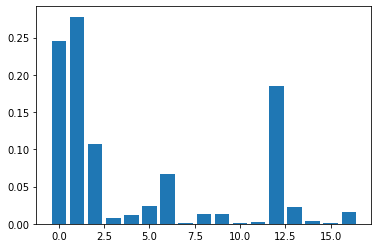

In [ ]:
# Ploting feature importances in a bar plot.

pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
pyplot.show()